# ***Time Series ***




**Alternative Hypothesis(H₁):** Cholesterol levels and chest pain type frequency exhibit significant trends or patterns over time, indicating changes that might be related to health interventions, seasonal effects, or external factors.

**Null Hypothesis **bold text****(H₀): Cholesterol levels and chest pain type frequency do not exhibit any significant trends or patterns over time.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/df.csv')
df.head()

,age,Gender,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,1,125,212,0,1,168,0,1.0,3,2,7,0
1,53,1,1,140,203,1,0,155,1,3.1,1,0,7,0
2,70,1,1,145,174,0,1,125,1,2.6,1,0,7,0
3,61,1,1,148,203,0,1,161,0,0.0,3,1,7,0
4,62,0,1,138,294,1,1,106,0,1.9,2,3,6,0


In [ ]:
from statsmodels.tsa.stattools import adfuller
import random
import math
from scipy import stats

# Generate time series data for 180 days with exercise_induced_chest_pain_type and cholestoral
data = {
    'timestamp': pd.date_range('2025-01-01', periods=180, freq='D'),  # Dayes timestamps
    'chest_pain_type': [random.choice([1, 2, 3, 4]) for _ in range(180)],
    'cholestoral': [150 + 25 * math.sin(x / 50) + random.uniform(-10, 10) for x in range(180)]}

# Create a DataFrame
df = pd.DataFrame(data)

# Set 'timestamp' as the index
df.set_index('timestamp', inplace=True)

# Calculate Z-scores for 'cholestoral' column to detect outliers
z_scores = np.abs(stats.zscore(df['cholestoral']))
outliers_cholestoral = df[z_scores > 3]

# Calculate Z-scores for 'chest_pain_type' column to detect outliers
z_scores_pain = np.abs(stats.zscore(df['chest_pain_type']))
outliers_chest_pain = df[z_scores_pain > 3]

# Output the outliers
print("Outliers in cholestoral:")
print(outliers_cholestoral)
print("\nOutliers in chest_pain_type:")
print(outliers_chest_pain)



Outliers in cholestoral:
Empty DataFrame
Columns: [chest_pain_type, cholestoral]
Index: []

Outliers in chest_pain_type:
Empty DataFrame
Columns: [chest_pain_type, cholestoral]
Index: []


In [ ]:
df.head()

,chest_pain_type,cholestoral
timestamp,,
2025-01-01,3,159.366203
2025-01-02,2,147.390299
2025-01-03,4,146.847108
2025-01-04,4,146.108147
2025-01-05,4,150.181354


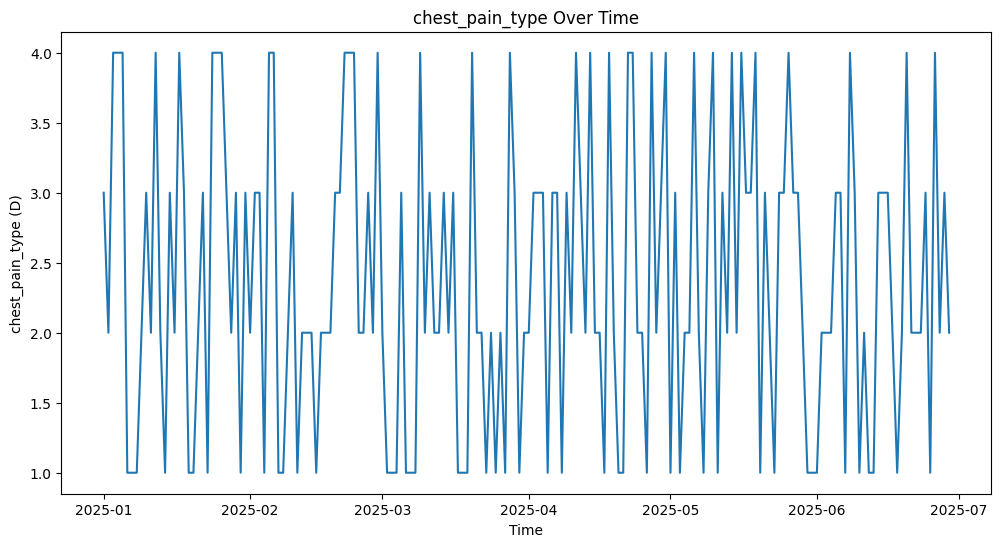

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['chest_pain_type'], label='chest_pain_type(Days)')
plt.title('chest_pain_type Over Time')
plt.xlabel('Time')
plt.ylabel('chest_pain_type (D)')
plt.show()

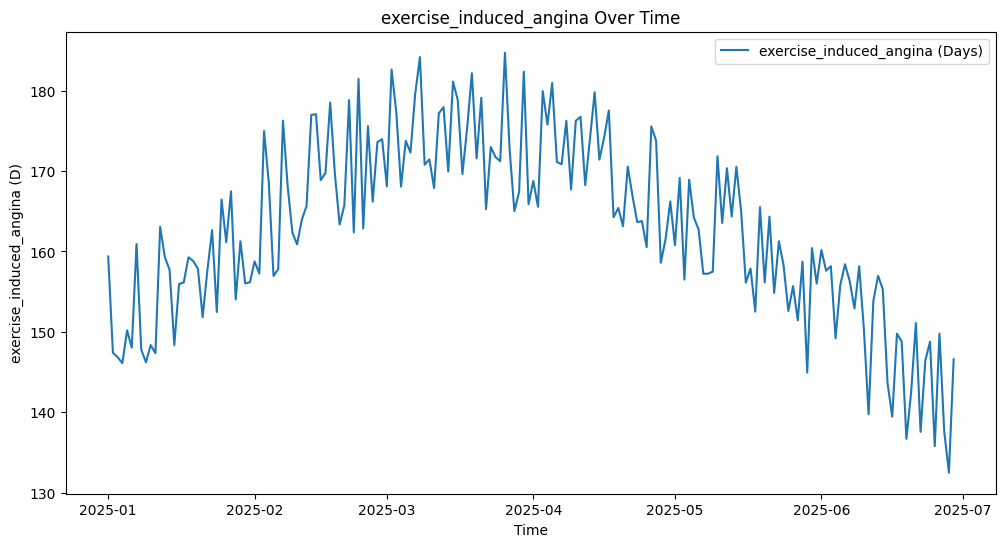

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cholestoral'], label='exercise_induced_angina (Days)')
plt.title('cholestoral Over Time')
plt.xlabel('Time')
plt.ylabel('cholestoral(D)')
plt.legend()
plt.show()


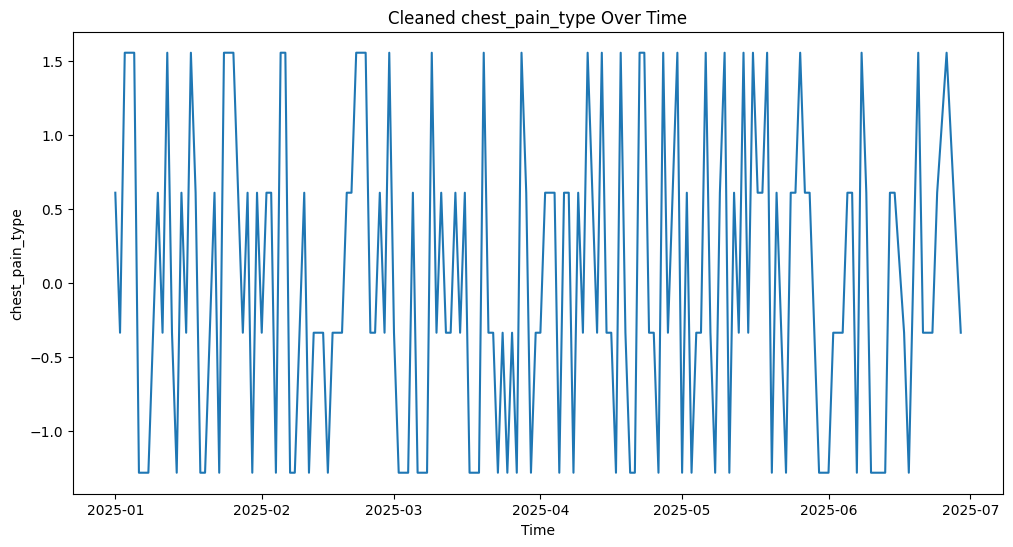

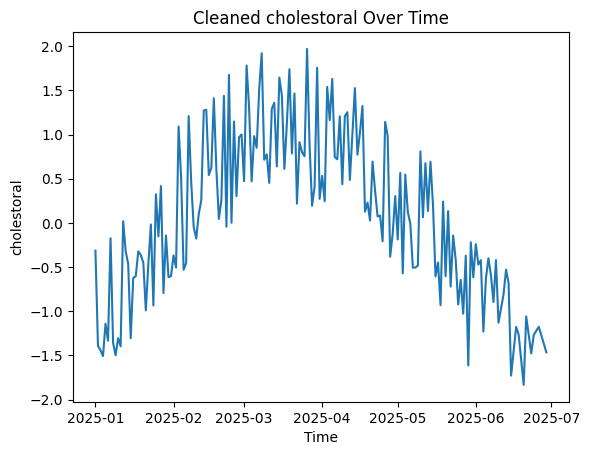

In [ ]:
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Calculate z-scores
df['z_score_chest_pain_type'] = zscore(df['chest_pain_type'])
df['z_score_cholestoral'] = zscore(df['cholestoral'])


# Remove rows with z-scores > 3 (indicating outliers)
df_clean = df[(df['z_score_chest_pain_type'].abs() <= 2) & (df['z_score_cholestoral'].abs() <=2)]

# Drop the original columns after cleaning
df_clean = df_clean.drop(columns=['chest_pain_type', 'cholestoral'])

# Plot cleaned data
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['z_score_chest_pain_type'], label='chest_pain_type')
plt.title('Cleaned chest_pain_type Over Time')
plt.xlabel('Time')
plt.ylabel('chest_pain_type')
plt.show()

plt.plot(df_clean.index, df_clean['z_score_cholestoral'], label='cholestoral')
plt.title('Cleaned cholestoral Over Time')
plt.xlabel('Time')
plt.ylabel('cholestoral')
plt.show()

In [ ]:
df_clean.head()

,z_score_chest_pain_type,z_score_cholestoral
timestamp,,
2025-01-01,0.609480,-0.313415
2025-01-02,-0.336265,-1.391210
2025-01-03,1.555226,-1.440095
2025-01-04,1.555226,-1.506599
2025-01-05,1.555226,-1.140023


**resampled**

In [ ]:
df_resampled = df_clean.resample('W').mean()

# Forward fill to handle potential missing values after resampling
df_resampled = df_resampled.fillna(method='ffill')

# Perform Augmented Dickey-Fuller test for z_score_cholestoral
cholestoral_results= adfuller(df_resampled['z_score_cholestoral'])
print("Augmented Dickey-Fuller Test for cholestoral:")
print(f"ADF Statistic: {cholestoral_results[0]:.4f}")
print(f"p-value: {cholestoral_results[1]:.4f}")
print(f"Critical Values: {cholestoral_results[4]}")
if cholestoral_results[1] < 0.05:
    print("The cholestoral series is stationary (reject the null hypothesis).")
else:
    print("The cholestoral series is not stationary (fail to reject the null hypothesis).")

print("\n" + "="*50 + "\n")

# Perform Augmented Dickey-Fuller test for z_score_chest_pain_type
chest_pain_type_result = adfuller(df_resampled['z_score_chest_pain_type'])  # Change to 'z_score_chest_pain_type'
print("Augmented Dickey-Fuller Test for chest_pain_typea:") #Corrected typo
print(f"ADF Statistic: {chest_pain_type_result[0]:.4f}")
print(f"p-value: {chest_pain_type_result[1]:.4f}")
print(f"Critical Values: {chest_pain_type_result[4]}")
if chest_pain_type_result[1] < 0.05:  # Correct comparison
    print("The chest_pain_type series is stationary (reject the null hypothesis).") #Corrected typo
else:
    print("The chest_pain_type series is not stationary (fail to reject the null hypothesis).") #Corrected typo

Augmented Dickey-Fuller Test for cholestoral:
ADF Statistic: -2.4946
p-value: 0.1168
Critical Values: {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}
The cholestoral series is not stationary (fail to reject the null hypothesis).


Augmented Dickey-Fuller Test for chest_pain_typea:
ADF Statistic: -2.3880
p-value: 0.1451
Critical Values: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}
The chest_pain_type series is not stationary (fail to reject the null hypothesis).


<ipython-input-11-7b0960bbfa00>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled = df_resampled.fillna(method='ffill')


**Detrending**

In [ ]:
# Detrending the 'cholestoral' column using differencing (subtracting previous value from the current one)
df['cholestoral_differenced'] = df['cholestoral'] - df['cholestoral'].shift(1)

# Detrending the 'chest_pain_type' column using differencing (subtracting previous value from the current one)
df['chest_pain_type_differenced'] = df['chest_pain_type'] - df['chest_pain_type'].shift(1)

# Drop the NaN values that result from differencing the first row
df_differenced = df.dropna()

# Display the differenced data for both columns
print(df_differenced[['cholestoral', 'cholestoral_differenced', 'chest_pain_type', 'chest_pain_type_differenced']].head())


            cholestoral  cholestoral_differenced  chest_pain_type  \
timestamp                                                           
2025-01-02   147.390299               -11.975904                2   
2025-01-03   146.847108                -0.543191                4   
2025-01-04   146.108147                -0.738962                4   
2025-01-05   150.181354                 4.073207                4   
2025-01-06   148.039823                -2.141531                1   

            chest_pain_type_differenced  
timestamp                                
2025-01-02                         -1.0  
2025-01-03                          2.0  
2025-01-04                          0.0  
2025-01-05                          0.0  
2025-01-06                         -3.0  


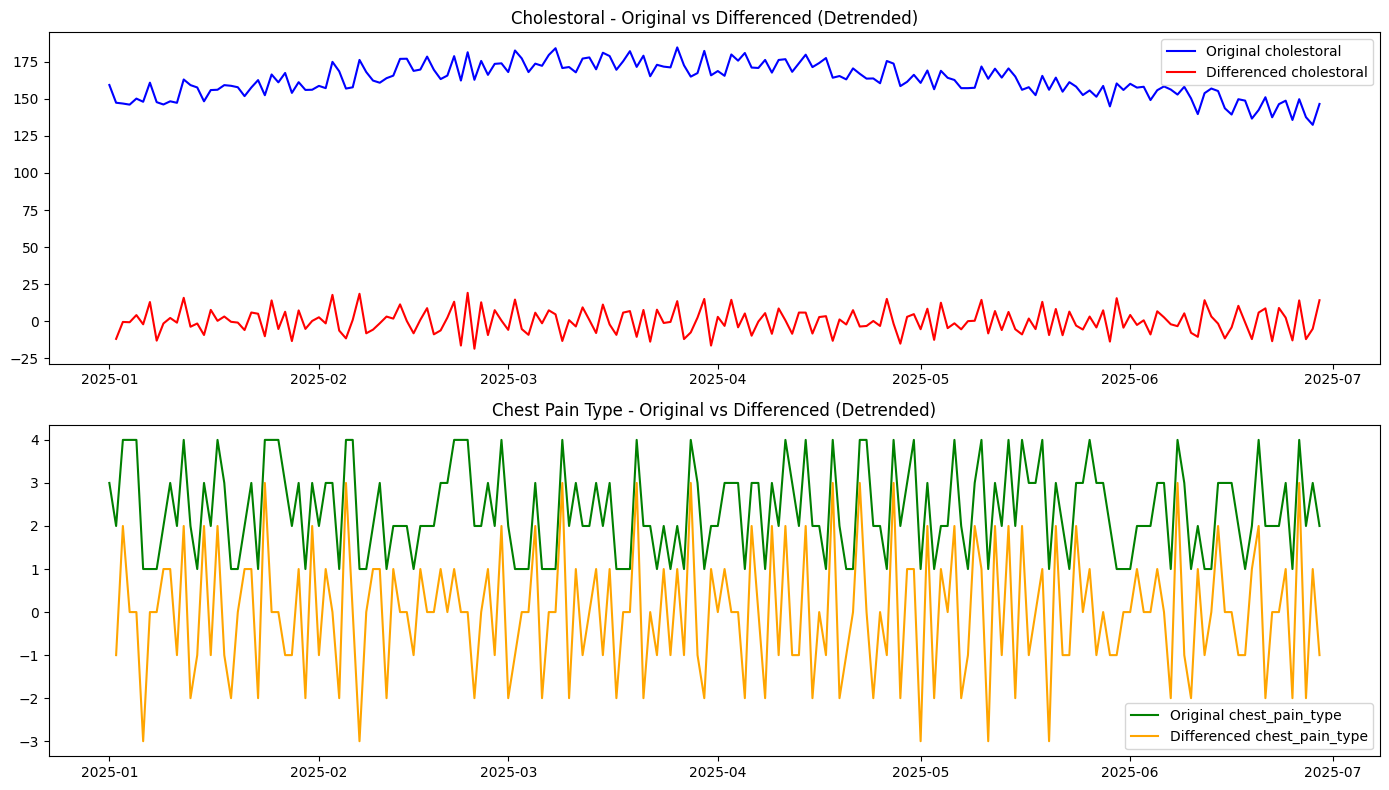

In [ ]:
# Drop the NaN values that result from differencing the first row
df_differenced = df.dropna()

# Plotting the original and differenced series for detrending
plt.figure(figsize=(14, 8))

# Plotting 'cholestoral' and its differenced version
plt.subplot(2, 1, 1)
plt.plot(df.index, df['cholestoral'], label='Original cholestoral', color='blue')
plt.plot(df_differenced.index, df_differenced['cholestoral_differenced'], label='Differenced cholestoral', color='red')
plt.title('Cholestoral - Original vs Differenced (Detrended)')
plt.legend()

# Plotting 'chest_pain_type' and its differenced version
plt.subplot(2, 1, 2)
plt.plot(df.index, df['chest_pain_type'], label='Original chest_pain_type', color='green')
plt.plot(df_differenced.index, df_differenced['chest_pain_type_differenced'], label='Differenced chest_pain_type', color='orange')
plt.title('Chest Pain Type - Original vs Differenced (Detrended)')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-17-a1131ac0db76>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_differenced['cluster'] = kmeans.fit_predict(data_for_clustering)


Cluster centers:
[[ 8.0314444  -0.09333333]
 [-5.91489513  0.05769231]]


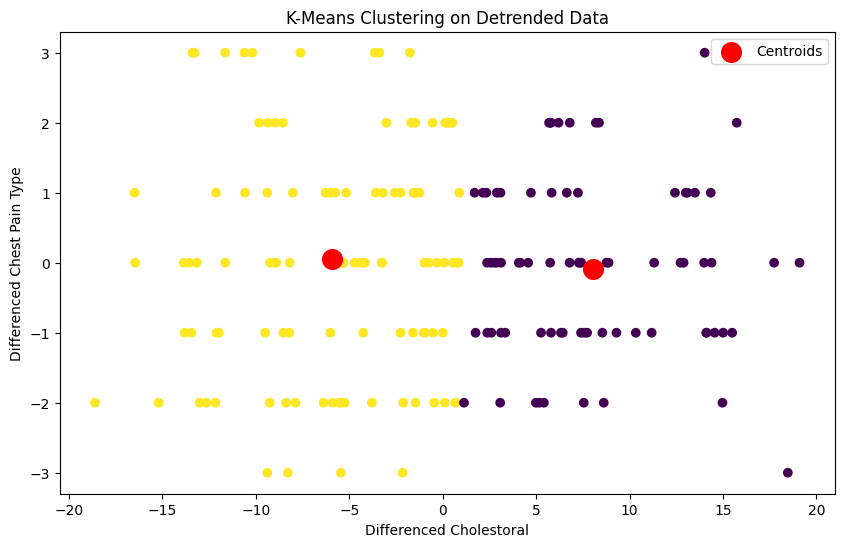

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting the columns that will be used for clustering (after differencing)
data_for_clustering = df_differenced[['cholestoral_differenced', 'chest_pain_type_differenced']]

# Apply K-Means algorithm with clusters as an example (you can modify this number as needed)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the K-Means model
df_differenced['cluster'] = kmeans.fit_predict(data_for_clustering)

# Display the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Plot the data with different clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_differenced['cholestoral_differenced'], df_differenced['chest_pain_type_differenced'], c=df_differenced['cluster'], cmap='viridis', marker='o')

# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')

plt.title('K-Means Clustering on Detrended Data')
plt.xlabel('Differenced Cholestoral')
plt.ylabel('Differenced Chest Pain Type')
plt.legend()
plt.show()
